# import and data load

In [4]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/insurance.csv'

# EDA

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
# 범주형 변수를 LabelEncoder를 통해 숫자로 변환

from sklearn.preprocessing import LabelEncoder

# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())       # drop_duplicates -> 중복된 값을 제거하는 함수수
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

# region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [10]:
# 각 변수들의 상관관계 확인

data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot: >

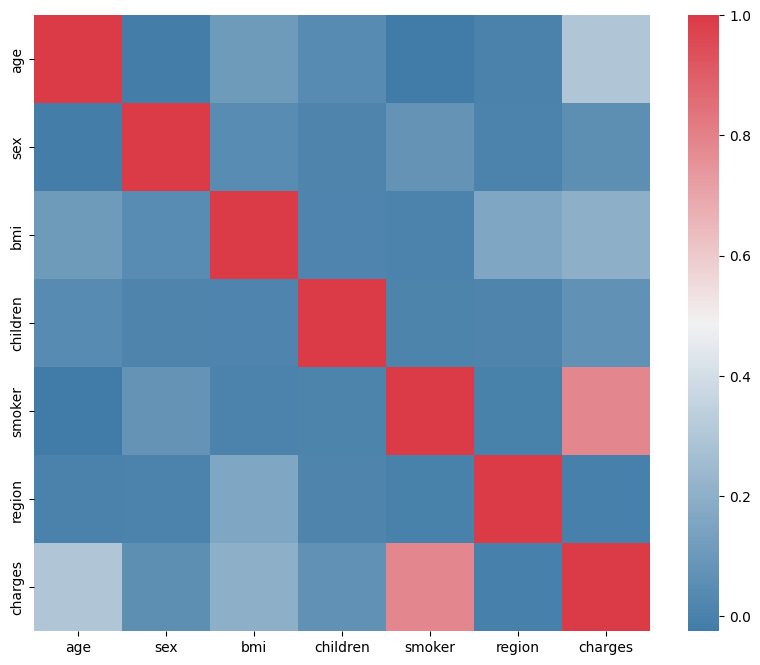

In [11]:
f, ax = pl.subplots(figsize = (10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
           square = True, ax=ax)

In [ ]:
# 흡연 여부가 의료비 청구 금액과 높은 상관관계를 가진 것을 알 수 있다.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

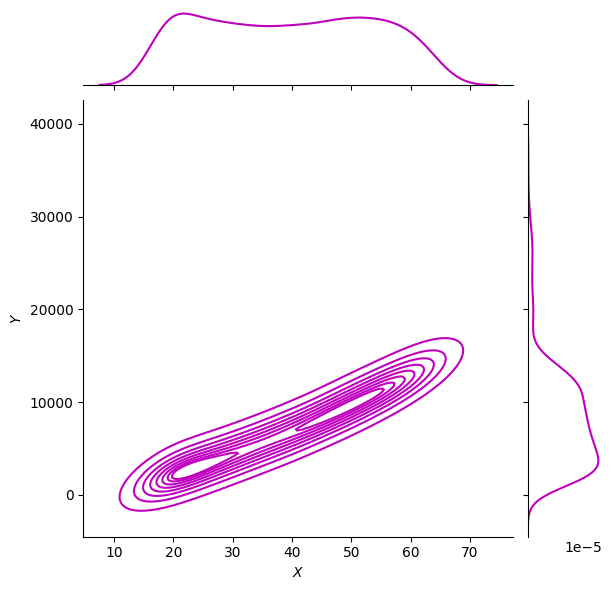

In [14]:
# 비흡연자들의 연령에 따른 진료비 청구금액의 분포도

g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

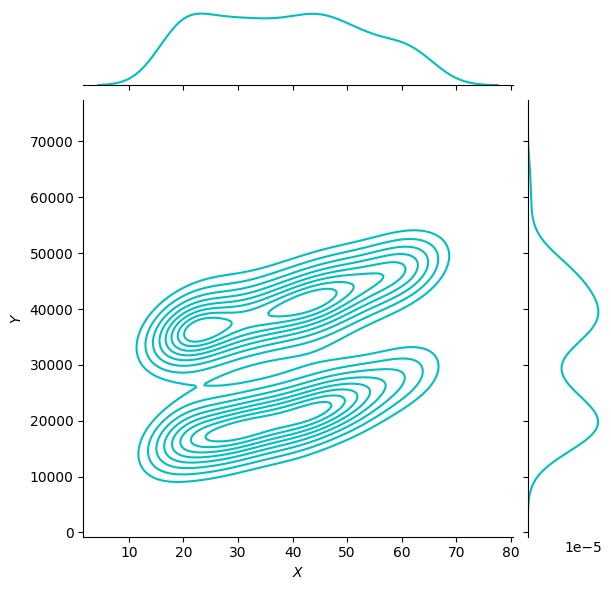

In [13]:
# 흡연자들의 연령에 따른 진료비 청구금액의 분포도

g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Smoker and non-smokers')

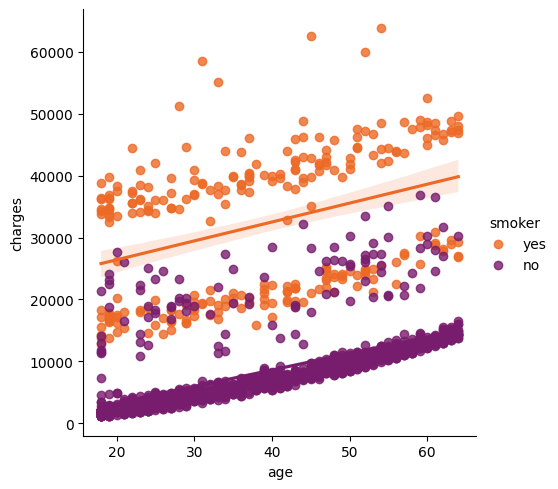

In [22]:
# 연령과 흡연 여부에 따른 의료비 금액 scatter차트

sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='inferno_r')
ax.set_title('Smoker and non-smokers')

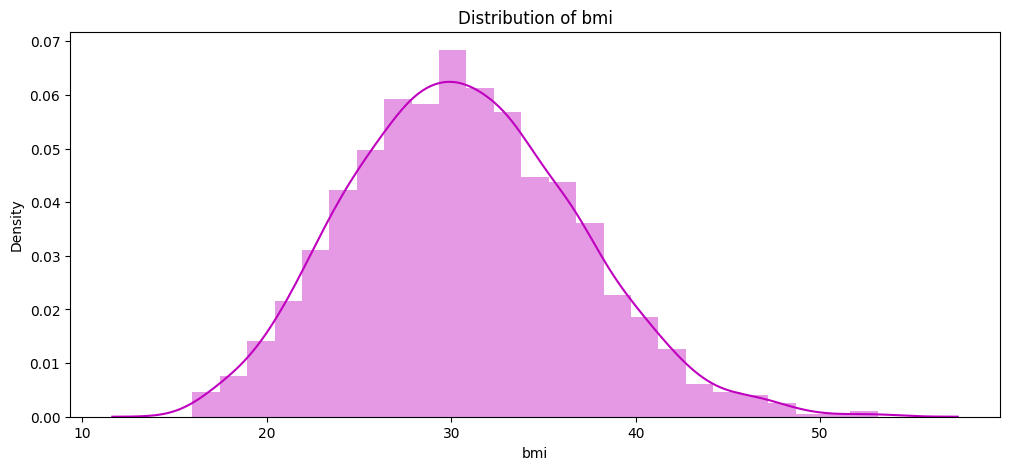

In [23]:
# bmi 분포도

pl.figure(figsize=(12,5))
pl.title('Distribution of bmi')
ax = sns.distplot(data['bmi'], color = 'm')

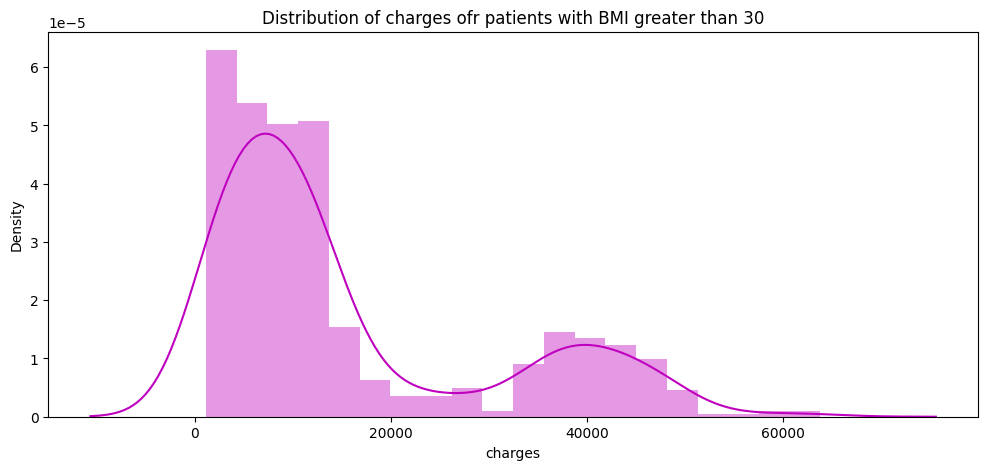

In [26]:
# BMI가 30을 초과하는 환자에 대한 의료비 청구금액 분포

pl.figure(figsize = (12, 5))
pl.title('Distribution of charges ofr patients with BMI greater than 30')
ax = sns.distplot(data[(data.bmi > 30)]['charges'], color = 'm')

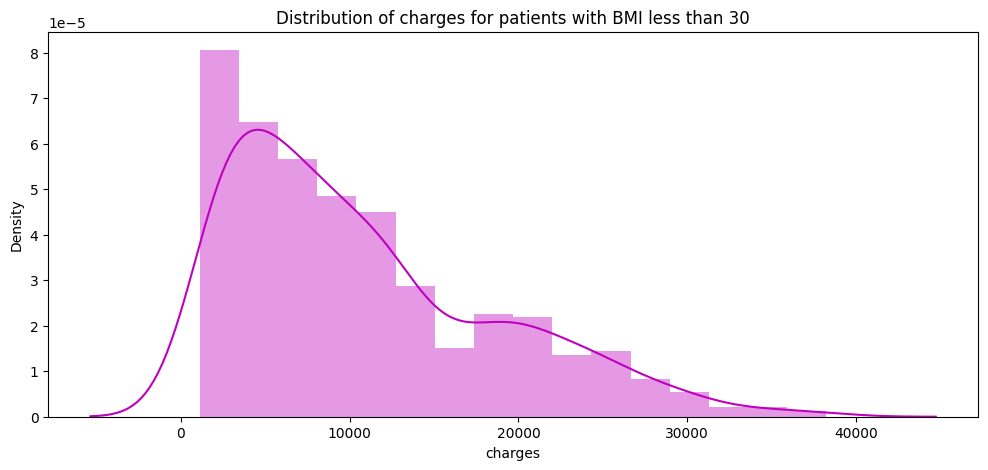

In [27]:
# BMI가 30미만에 해당하는 환자에 대한 의료비 청구금액 분포

pl.figure(figsize = (12, 5))
pl.title('Distribution of charges for patients with BMI less than 30')
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'm')

In [ ]:
# BMI가 30보다 높은 환자들이 의료비 청구금액이 더 높은 것을 확인할 수 있다.

Text(0.5, 1.0, 'Distribution of bmi and charges')

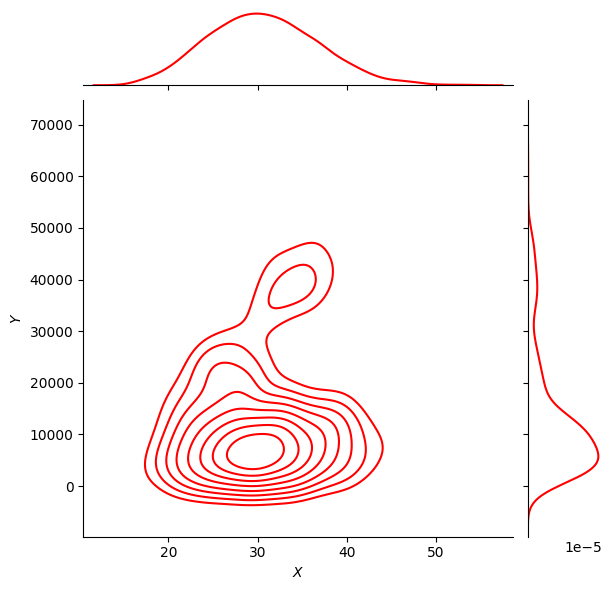

In [34]:
# bmi와 charges 간의 관계를 시각화 / bmi와 charges의 분포와 두 변수간 결합분포 확인

g = sns.jointplot(x='bmi', y='charges', data = data, kind='kde', color='r')
g.plot_joint(pl.scatter, c='w', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$', '$Y$')
ax.set_title('Distribution of bmi and charges')

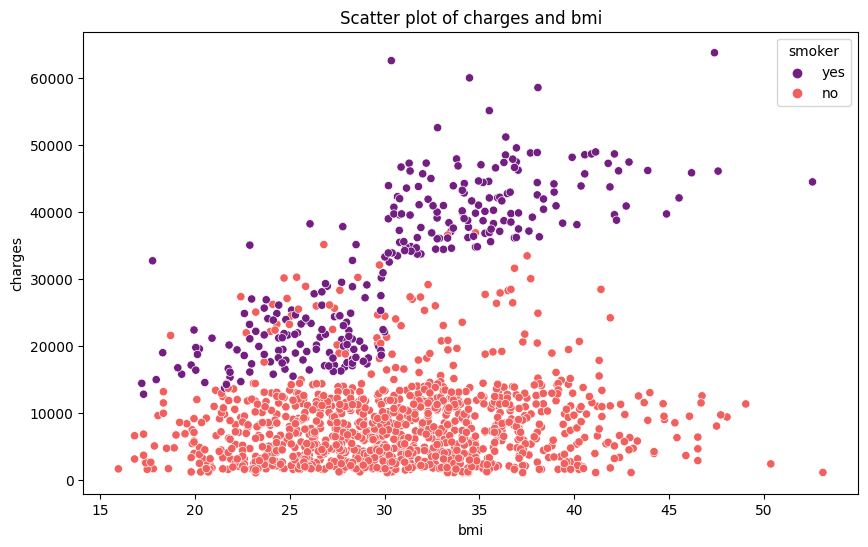

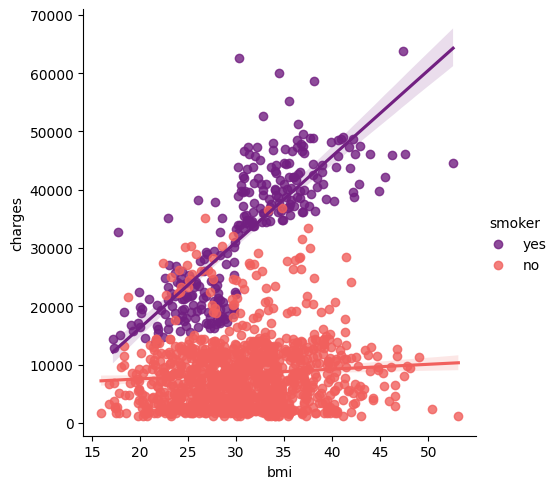

In [37]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi', y='charges', data=data, palette='magma', hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x='bmi', y='charges', hue='smoker', data=data, palette='magma')

In [ ]:
# 흡연자들의 bmi가 높을 수록 의료비 청구금액도 높아지는 것을 확인할 수 있다. 비례관계(양의 상관관계)

# Modeling

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [44]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Linear_model

In [45]:
x = data.drop(['charges'], axis=1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test, y_test))

0.7962732059725786


In [46]:
# 2차 다항식 회귀 - 'charges', 'region'열을 삭제한 특성행렬 : X, 목표 벡터 : Y
# 데이터의 관계가 비선형적일 가능성이 있는 경우, 2차 다항식 회귀를 사용하여 더 복잡한 모델을 만들어야 함.

X = data.drop(['charges', 'region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state=0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test, Y_test))

0.8849197344147232


### RandomForestRegressor

In [54]:
# GridSearchCV를 이용하여 Hyperparameter 튜닝

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, 20],
              'max_features': ['auto', 'sqrt', 'log2']
             }

grid_search = GridSearchCV(forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("최적 파라미터:", grid_search.best_params_)
print("최적 모델:", grid_search.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
최적 모델: RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)


In [73]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

In [74]:
print('MSE train data:', mean_squared_error(y_train, forest_train_pred))
print('MSE test data:', mean_squared_error(y_test, forest_test_pred))
print('R2 train data:', r2_score(y_train, forest_train_pred))
print('R2 test data:', r2_score(y_test, forest_test_pred))

MSE train data: 3746794.1753259622
MSE test data: 20055026.18579621
R2 train data: 0.9737790325075959
R2 test data: 0.872613534159032


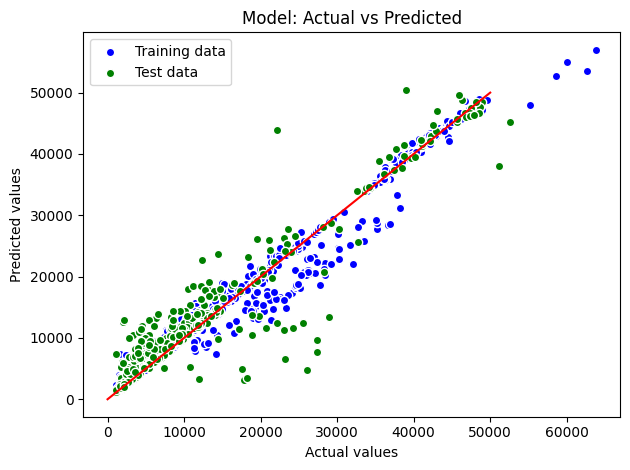

In [75]:
pl.scatter(y_train, forest_train_pred, c="blue", edgecolor="white", label="Training data")
pl.scatter(y_test, forest_test_pred, c="green", edgecolor="white", label="Test data")
pl.title("Model: Actual vs Predicted")
pl.xlabel("Actual values")
pl.ylabel("Predicted values")
pl.legend(loc="upper left")
pl.plot([0, 50000], [0, 50000], c="red")
pl.tight_layout()
pl.show()